In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import KBinsDiscretizer

In [2]:
student_marks = pd.read_csv('Datasets/student_performance.csv')

student_marks.sample(10)

,Hours Studied,Score Obtained,Outliers
54,425,52.497919,False
110,932,99.794208,False
69,602,90.238411,False
46,320,23.866729,False
45,316,23.005512,False
42,307,21.148456,False
50,396,43.831583,False
5,59,1.349299,False
116,958,12.000000,True
47,347,30.237790,False


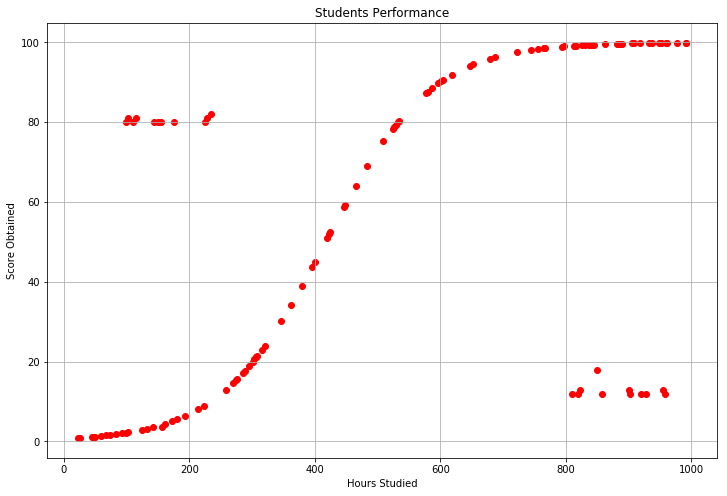

In [40]:
fig, ax = plt.subplots(figsize=(12, 8))

plt.scatter(student_marks['Hours Studied'], student_marks['Score Obtained'], color='red')

ax.set(xlabel='Hours Studied', ylabel='Score Obtained',
       title='Students Performance')
ax.grid()

plt.show()

In [41]:
k_bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

In [42]:
k_bins_array = k_bins.fit_transform(student_marks[['Score Obtained', 'Hours Studied']])

k_bins_array.shape

(122, 2)

In [43]:
kbins_df = pd.DataFrame(data = k_bins_array,
                        columns = ['Binned_Score','Binned_Hours'])
kbins_df.sample(10)

,Binned_Score,Binned_Hours
103,0.0,2.0
9,0.0,0.0
23,0.0,0.0
87,2.0,2.0
64,2.0,1.0
75,2.0,2.0
36,0.0,0.0
120,2.0,2.0
13,0.0,0.0
17,0.0,0.0


In [44]:
students_kbins = pd.concat([student_marks, kbins_df], axis=1)

students_kbins.sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours
120,991,99.898515,False,2.0,2.0
15,115,81.000000,True,2.0,0.0
114,951,99.836095,False,2.0,2.0
41,304,20.554359,False,0.0,0.0
5,59,1.349299,False,0.0,0.0
110,932,99.794208,False,2.0,2.0
62,529,79.380246,False,2.0,1.0
2,45,1.143020,False,0.0,0.0
83,797,98.968717,False,2.0,2.0
52,420,50.999867,False,1.0,1.0


In [45]:
students_kbins['Binned_Score'].unique()

array([0., 2., 1.])

In [46]:
students_kbins['Binned_Hours'].unique()

array([0., 1., 2.])

In [47]:
marks_edges = k_bins.bin_edges_[0]
hours_edges = k_bins.bin_edges_[1]

marks_edges, hours_edges

(array([ 0.8697363 , 33.87973234, 66.88972838, 99.89972442]),
 array([ 22.        , 345.33333333, 668.66666667, 992.        ]))

In [48]:
students_kbins[(students_kbins['Binned_Score'] != students_kbins['Binned_Hours'])].sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours
11,100,80.000000,True,2.0,0.0
62,529,79.380246,False,2.0,1.0
63,533,80.154838,False,2.0,1.0
59,509,75.175606,False,2.0,1.0
14,110,80.000000,True,2.0,0.0
116,958,12.000000,True,0.0,2.0
58,483,68.911819,False,2.0,1.0
19,144,80.000000,True,2.0,0.0
31,228,81.000000,True,2.0,0.0
68,597,89.696980,False,2.0,1.0


In [49]:
students_kbins['Comment'] = ''

students_kbins.head()

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours,Comment
0,22,0.869736,False,0.0,0.0,
1,26,0.912112,False,0.0,0.0,
2,45,1.143020,False,0.0,0.0,
3,46,1.156660,False,0.0,0.0,
4,50,1.212843,False,0.0,0.0,


In [50]:
students_kbins.loc[students_kbins['Binned_Score'] - 
                   students_kbins['Binned_Hours'] == 2,'Comment'] = 'Suspicious'

In [51]:
students_kbins.loc[students_kbins['Binned_Hours'] - 
                   students_kbins['Binned_Score'] == 2,'Comment'] = 'Needs_help'

In [52]:
students_kbins[(students_kbins['Binned_Score'] != students_kbins['Binned_Hours'])].sample(10)

,Hours Studied,Score Obtained,Outliers,Binned_Score,Binned_Hours,Comment
14,110,80.000000,True,2.0,0.0,Suspicious
64,534,80.345030,False,2.0,1.0,
21,155,80.000000,True,2.0,0.0,Suspicious
58,483,68.911819,False,2.0,1.0,
32,235,82.000000,True,2.0,0.0,Suspicious
88,820,12.000000,True,0.0,2.0,Needs_help
11,100,80.000000,True,2.0,0.0,Suspicious
68,597,89.696980,False,2.0,1.0,
115,955,13.000000,True,0.0,2.0,Needs_help
116,958,12.000000,True,0.0,2.0,Needs_help


In [55]:
categories = students_kbins['Comment'].unique()

categories

array(['', 'Suspicious', 'Needs_help'], dtype=object)

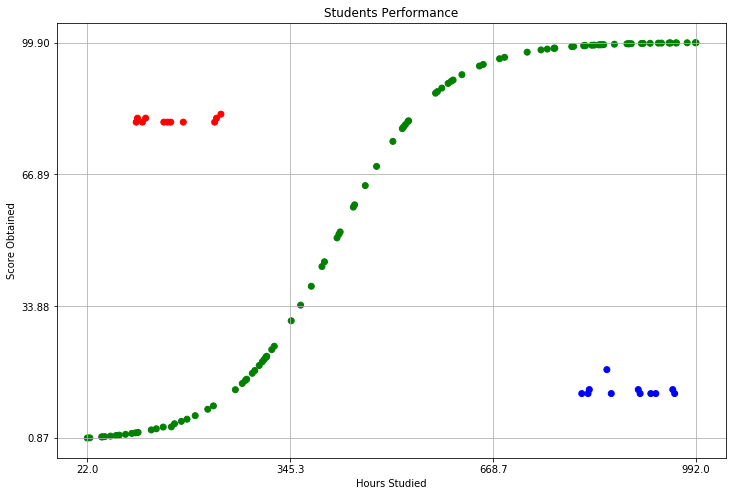

In [56]:
fig, ax = plt.subplots(figsize=(12, 8))

colors = {categories[0]:'green', categories[1]:'red', categories[2]:'blue'}

ax.scatter(students_kbins['Hours Studied'], students_kbins['Score Obtained'], 
           c=students_kbins['Comment'].apply(lambda x: colors[x]))

ax.set(xlabel='Hours Studied', ylabel='Score Obtained',
       title='Students Performance')

ax.grid()
ax.set_xticks(hours_edges);
ax.set_yticks(marks_edges);

plt.show()